For all of the following problems, we study the following optimization problem:<br>
$$
\begin{align}
\min. \quad & f(x) = x_1^2 + x_2^2 +x_1 +2x_2\\
\text{s.t.}\quad &x_1,x_2\in\mathbb R
\end{align} 

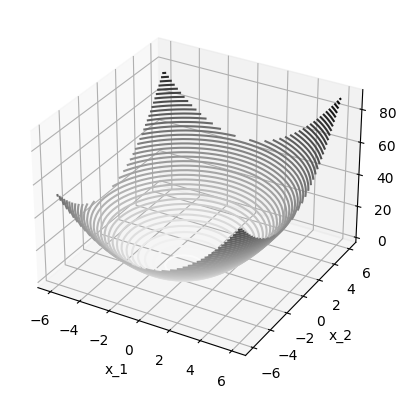

In [1]:
#virtualizing the function
import matplotlib.pyplot as plt
import numpy as np

def f(X):
    return X[0]**2 + X[1]**2 + X[0] + 2*X[1]
x_1= np.linspace(-6, 6, 30)
x_2 = np.linspace(-6, 6, 30)
X = np.meshgrid(x_1, x_2)
Z = f(X)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X[0],X[1], Z, 50, cmap='binary')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('z')
plt.show()

### Question:
<p>
1. (3 points) Implement <b>the steepest descent algorithm</b>, but <span style="color:green">do</span> a golden section search to each new search direction. In other words, <span style="color:green">use</span> line search to determine optimal step length. This means that you need to <span style="color:green">define</span> a single-variable function to determine the step length. Set the length of the interval for doing line search as a parameter of the method. Solve the above problem using your method.</p>

[-0.49999991 -0.99999982]
4


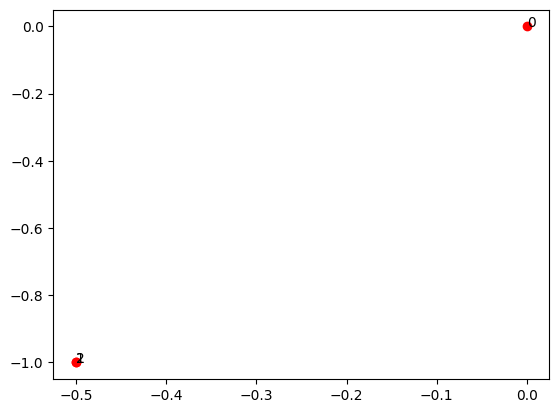

In [2]:
import numpy as np
import math

#plot 
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist

ON_PLOT = True
if ON_PLOT:
    steps = []
gr = (math.sqrt(5)-1)/2

def f(x):
    return pow(x[0],2) + pow(x[1],2) +x[0] +2*x[1]

#X = (x_1, x_2, ...,x_n)^T, X being a vector;
#h being the difference.
#return a differential vector at point X,
def gradient(f,X,h):
    #df has the same length(size) as vector X
    df = np.zeros(X.size)
    #i mean dimension, axis
    for i in range(X.size):
        #difference at point x_i
        #a1, a2 is a vector like X,
        #differentiate only at one axis of i, and keep other axis same as the original point
        a1 = X.copy()
        a2 = X.copy()
        a1[i] = X[i] - h
        a2[i] = X[i] + h
        df[i] = ( f(a2) - f(a1) )/(2*h)
    return df

def linesearch(x, dk):  
    ak = 0.01
    for i in range(20):
        newf, oldf = f(x + ak * dk), f(x)
        if newf < oldf:
            return ak
        else:
            ak = ak / 4
    return ak

#min f(x_k + t*p_k),
def golden_section_line_search(a,b,f,L):
    x = a
    y = b
    while y-x>2*L:
        d = x + gr*(y-x)
        c = y - gr*(y-x)
        if f(d)>f(c):
            y = d
        else:
            x = c
    return (x+y)/2

def t_min(x,p):
    t_func = lambda t: f(x + t * p)
    t = golden_section_line_search(0.0, 50.5, t_func, 10**-3)
    return t
    
def steepest(f,x):
    theta = 10**-5
    h = 10**-5
    for _ in range (10**4):  
        df = gradient(f,x,h)
        if np.linalg.norm(df) < theta:
            return x     
        p = -df
        #1-dimension search, find min f(x_k + t*p_k)
        # golden
        t = t_min(x,p)
        # fixed step
        #t = linesearch(x,p)
        x = x +t*p      
        if ON_PLOT:
            steps.append(list(x))
    return x
     
x0 = np.array([0.0,0.0])   
x = steepest(f,x0)
print( x)

def plot_2d_steps(steps,start):
    myvec = np.array([start]+steps).transpose()
    #print(myvec)
    plt.plot(myvec[0,],myvec[1,],'ro')
    for label,x,y in zip([str(i) for i in range(len(steps)+1)],myvec[0,],myvec[1,]):
        plt.annotate(label,xy = (x, y))
    return plt

if ON_PLOT:
    print(np.size(steps))
    plot_2d_steps(steps,x0).show()

<p>
2. (2 points) Plot the steps of the steepest descent algorithm implemented at the class (with fixed step lengths) against the steps of the steepest descent algorithm that you implemented above. You can choose any starting point you wish, but not the optimum. Compare and analyze the results of both methods.
</p>

Optimal solution is  [-0.44631291 -0.89262582]
20


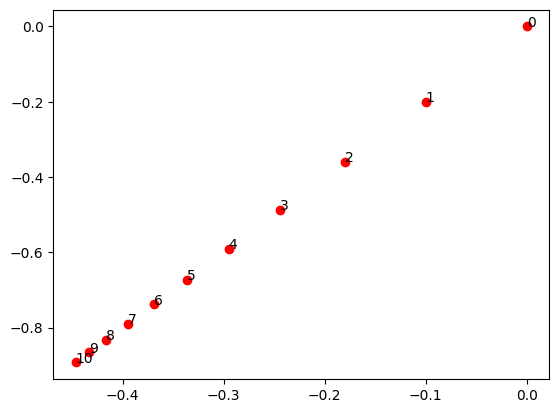

In [3]:
import numpy as np
def f(x):
    return pow(x[0],2) + pow(x[1],2) +x[0] +2*x[1]

def gradient(X,h):
    #df has the same length(size) as vector X
    df = np.zeros(X.size)
    #i mean dimention, axis
    for i in range(X.size):
        #difference at point x_i
        #a1, a2 is a vector like X,
        #differentiate only at one axis of i, and keep other axis same as the original point
        a1 = X.copy()
        a2 = X.copy()
        a1[i] = X[i] - h
        a2[i] = X[i] + h
        df[i] = ( f(a2) - f(a1) )/(2*h)
    return df

def steepest_descent(f,start,step,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    while abs(f_old-f_new)>precision:
    #while np.linalg.norm(ad.gh(f)[0](x))>precision: # an alternative stopping rule
        f_old = f_new # store value at the current point
        d = -gradient(x,0.01) # search direction
        x = x+d*step # take a step
        f_new = f(x) # compute function value at the new point
        steps.append(list(x)) # save step
    return x,f_new,steps

start = [0.0,0.0]
step_size = 0.1
precision = 0.01
(x_value,f_value,steps) = steepest_descent(f,start,step_size,precision)
print("Optimal solution is ",x_value)
# print(len(steps))
# print(steps)

import matplotlib.pyplot as plt

def plot_2d_steps(steps,start):
    myvec = np.array([start]+steps).transpose()
    #print(myvec)
    plt.plot(myvec[0,],myvec[1,],'ro')
    for label,x,y in zip([str(i) for i in range(len(steps)+1)],myvec[0,],myvec[1,]):
        plt.annotate(label,xy = (x, y))
    return plt
print(np.size(steps))
plot_2d_steps(steps,start).show()

The minimal points will be ${x_1 = -1/2, x_2 = -1}$;

|         | Golden Section            | Fixed Step                |
|---------|---------------------------|---------------------------|
| results | [-0.49999991 -0.99999982] | [-0.44631291 -0.89262582] |
| steps   | 4                         | 20                        |

### Conclusion:
The Steepest decent algorithm works better with golden section search in determining optimal steps

<p>
3. (3 points) Implement the Quasi-Newton method with DFP update as described e.g., at 
<a>https://en.wikipedia.org/wiki/Davidon%E2%80%93Fletcher%E2%80%93Powell_formula</a>. In other words, replace the computation of the inverse Hessian in the Solve above problem using this method.
</p>

In [4]:
import numpy as np
import math

#plot 
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist
ON_PLOT = False
if ON_PLOT:
    steps = []

gr = (math.sqrt(5)-1)/2
def f(x):
    return pow(x[0],2) + pow(x[1],2) +x[0] +2*x[1]

def gradient(f,X,h):
    #df has the same length(size) as vector X
    df = np.zeros(X.size)
    func = f
    #i mean dimention, axis
    for i in range(X.size):
        #difference at point x_i
        #a1, a2 is a vector like X,
        #differentiate only at one axis of i, and keep other axis same as the original point
        a1 = X.copy()
        a2 = X.copy()
        a1[i] = X[i] - h
        a2[i] = X[i] + h
        df[i] = ( func(a2) - func(a1) )/(2*h)
    return df

#min f(x_k + t*p_k),
def golden_section_line_search(a,b,f,L):
    x = a
    y = b
    while y-x>2*L:
        d = x + gr*(y-x)
        c = y - gr*(y-x)
        if f(d)>f(c):
            y = d
        else:
            x = c
    return (x+y)/2
def t_min(x,p):
    t_func = lambda t: f(x + t * p)
    t = golden_section_line_search(0.0, 24, t_func, 0.001)
    return t

#Main DFP function, 
#sk = x_{k+1} - x_k
#yk = g_{k+1} - g_k
#use np.dot 
def delta_dk(yk, sk, dk):
    d = ( np.dot(sk,sk.T)/np.dot(sk.T,yk) )- \
        np.dot(np.dot(np.dot(dk, yk), yk.T),dk)/np.dot(np.dot(yk.T, dk) ,yk)
    return d
    
#x_k is current point
def DFP(f,xk):
    epsilon, h, maxiter = 10**-5, 10**-5, 10**3
    #D will eventually be approaching Hessian Matrix of function f(x)
    dk = np.eye(np.size(xk))
    for _ in range(maxiter):
        # df = partial derivative of function at vector X
        df = gradient(f,xk,h)
        #gk = np.matrix([df]).T
        #if the norm of current grandient smaller than epsilon
        if np.linalg.norm(df) < epsilon:
            return xk        
        #pk is vector = -gk when dk is identity but, dk will change
        pk = -np.dot(dk,df)
        t = t_min(xk,pk)
        #t = linesearch(f, xk, pk)
        xk1 = xk + pk*t
        #optimize the xk1 
        df1 = gradient(f, xk1,h)
        #gk1 = np.matrix([df1]).T  
        if np.linalg.norm(df1) < epsilon:
            return xk1
        #yk = g_{k+1} - g_k
        yk = df1 - df
        sk = xk1 - xk
        dk1 = dk + delta_dk(yk,sk,dk)
        #iterate next 
        dk = dk1
        xk = xk1
        if ON_PLOT:
            steps.append(list(xk))   
    return xk   
x0 = np.array([0.0,0.0])
print(DFP(f,x0) )

def plot_2d_steps(steps,start):
    myvec = np.array([start]+steps).transpose()
    #print(myvec)
    plt.plot(myvec[0,],myvec[1,],'ro')
    for label,x,y in zip([str(i) for i in range(len(steps)+1)],myvec[0,],myvec[1,]):
        plt.annotate(label,xy = (x, y))
    return plt

if ON_PLOT:
    print(np.size(steps))
    plot_2d_steps(steps,x0).show()
    

[-0.50009604 -0.99990395]


# Validate: 

$$
\begin{align}
df/dx_1 = 2x_1 + 1 \\
df/dx_2 = 2x_2 + 2 \\
d^2f/dx_1^2 = 2 \\
d^2f/dx_2^2 = 2 \\ 
d^2f/dx_1dx_2 = 0 \\
d^2f/dx_2dx_1 = 0 \\
Hessian \quad Matrix \quad is \quad Positive-Definite \\
f(x_1,x_2) \quad has \quad minimal \quad point \quad at \quad X=(-1/2, -1)^T
\end{align}